# Loading Datasets

In [ ]:
import xarray as xr
ds_fc = xr.open_dataset("fourcastnetv2-small_20210601_0000_forecast.nc")

In [ ]:
import xarray as xr
ds_fc2 = "/content/drive/MyDrive/Fmodel/merged_era5_6hourly_june2021.nc"
ds1 = xr.open_dataset(ds_fc2)

# Subsetting Datasets to India Region

In [ ]:
# Define India region
ds_fc_india = ds_fc.sel(latitude=slice(35, 5), longitude=slice(65, 100))
ds1_india = ds1.sel(latitude=slice(35, 5), longitude=slice(65, 100))


In [ ]:
# Interpolate ERA5 to ForecastNet times
msl_era5_interp = ds1_india["msl"].interp(valid_time=ds_fc_india.time)


In [ ]:
# Drop pressure_level if it exists
if "pressure_level" in msl_era5_interp.dims:
    msl_era5_interp = msl_era5_interp.isel(pressure_level=0, drop=True)


# Variable : Mean Sea Level Pressure (mslp)

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

# Convert to hPa
msl_fc_hpa = ds_fc_india["msl"] / 100
msl_era5_hpa = msl_era5_interp / 100

# Drop pressure level if mistakenly included
if "pressure_level" in msl_era5_hpa.dims:
    msl_era5_hpa = msl_era5_hpa.isel(pressure_level=0, drop=True)

# Create plotting function
def plot_mslp_interactive(time_idx):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # ForecastNet
    cf1 = axs[0].contourf(ds_fc_india.longitude, ds_fc_india.latitude,
                          msl_fc_hpa.isel(time=time_idx), levels=20, cmap="viridis")
    axs[0].set_title(f"ForecastNet MSLP\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")

    # ERA5
    cf2 = axs[1].contourf(ds1_india.longitude, ds1_india.latitude,
                          msl_era5_hpa.isel(time=time_idx), levels=20, cmap="viridis")
    axs[1].set_title(f"ERA5 MSLP\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[1].set_xlabel("Longitude")

    cbar = fig.colorbar(cf1, ax=axs, orientation='horizontal', pad=0.08)
    cbar.set_label("Mean Sea Level Pressure (hPa)")

    plt.tight_layout()
    plt.show()

# Create interactive slider
interact(plot_mslp_interactive, time_idx=widgets.IntSlider(min=0, max=len(ds_fc_india.time)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='time_idx', max=56), Output()), _dom_classes=('widget-int…

# Variable : Temperature (t)

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Choose pressure level to visualize
level = 500

# Select temperature at 500 hPa
t_fc_500 = ds_fc_india["t"].sel(level=level)
t_era5_500 = ds1_india["t"].sel(pressure_level=level)

# Interpolate ERA5 time to match ForecastNet
t_era5_interp = t_era5_500.interp(valid_time=ds_fc_india.time)

# Interactive plotting function
def plot_temp_interactive(time_idx):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # ForecastNet temp
    cf1 = axs[0].contourf(ds_fc_india.longitude, ds_fc_india.latitude,
                          t_fc_500.isel(time=time_idx), levels=20, cmap="plasma")
    axs[0].set_title(f"ForecastNet Temp @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")

    # ERA5 temp
    cf2 = axs[1].contourf(ds1_india.longitude, ds1_india.latitude,
                          t_era5_interp.isel(time=time_idx), levels=20, cmap="plasma")
    axs[1].set_title(f"ERA5 Temp @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[1].set_xlabel("Longitude")

    # Shared colorbar
    cbar = fig.colorbar(cf1, ax=axs, orientation='horizontal', pad=0.08)
    cbar.set_label("Temperature (K)")

    plt.tight_layout()
    plt.show()

# Interactive slider
interact(plot_temp_interactive, time_idx=widgets.IntSlider(min=0, max=len(ds_fc_india.time)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='time_idx', max=56), Output()), _dom_classes=('widget-int…

# Variable : U-Wind

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Select pressure level
level = 500

# Slice U wind at 500 hPa
u_fc_500 = ds_fc_india["u"].sel(level=level)
u_era5_500 = ds1_india["u"].sel(pressure_level=level)

# Interpolate ERA5 U-wind to ForecastNet time steps
u_era5_interp = u_era5_500.interp(valid_time=ds_fc_india.time)

# Define interactive plotting function
def plot_u_interactive(time_idx):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # ForecastNet U-wind
    cf1 = axs[0].contourf(ds_fc_india.longitude, ds_fc_india.latitude,
                          u_fc_500.isel(time=time_idx), levels=20, cmap="coolwarm")
    axs[0].set_title(f"ForecastNet U-Wind @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")

    # ERA5 U-wind
    cf2 = axs[1].contourf(ds1_india.longitude, ds1_india.latitude,
                          u_era5_interp.isel(time=time_idx), levels=20, cmap="coolwarm")
    axs[1].set_title(f"ERA5 U-Wind @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[1].set_xlabel("Longitude")

    # Shared colorbar
    cbar = fig.colorbar(cf1, ax=axs, orientation='horizontal', pad=0.08)
    cbar.set_label("U Wind Component (m/s)")

    plt.tight_layout()
    plt.show()

# Interactive slider
interact(plot_u_interactive, time_idx=widgets.IntSlider(min=0, max=len(ds_fc_india.time)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='time_idx', max=56), Output()), _dom_classes=('widget-int…

# Variable : V-Wind

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define pressure level
level = 500

# Slice the V wind data
v_fc_500 = ds_fc_india["v"].sel(level=level)
v_era5_500 = ds1_india["v"].sel(pressure_level=level)

# Interpolate ERA5 V wind to ForecastNet time
v_era5_interp = v_era5_500.interp(valid_time=ds_fc_india.time)

# Define plotting function
def plot_v_interactive(time_idx):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # ForecastNet V wind
    cf1 = axs[0].contourf(ds_fc_india.longitude, ds_fc_india.latitude,
                          v_fc_500.isel(time=time_idx), levels=20, cmap="coolwarm")
    axs[0].set_title(f"ForecastNet V-Wind @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")

    # ERA5 V wind
    cf2 = axs[1].contourf(ds1_india.longitude, ds1_india.latitude,
                          v_era5_interp.isel(time=time_idx), levels=20, cmap="coolwarm")
    axs[1].set_title(f"ERA5 V-Wind @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[1].set_xlabel("Longitude")

    # Shared colorbar
    cbar = fig.colorbar(cf1, ax=axs, orientation='horizontal', pad=0.08)
    cbar.set_label("V Wind Component (m/s)")

    plt.tight_layout()
    plt.show()

# Create interactive slider
interact(plot_v_interactive, time_idx=widgets.IntSlider(min=0, max=len(ds_fc_india.time)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='time_idx', max=56), Output()), _dom_classes=('widget-int…

# RMSE Results

In [ ]:
# Forecast time
forecast_time = ds_fc["time"].values[:ref_len]
import pandas as pd
# Now build dataframe
rmse_df = pd.DataFrame(rmse_results)
rmse_df["Forecast Time"] = forecast_time
rmse_df = rmse_df.set_index("Forecast Time")
rmse_df

,Temperature (K),U Wind (m/s),V Wind (m/s),MSLP (hPa)
Forecast Time,,,,
2021-06-01 00:00:00,0.567611,2.040490,2.006033,5.357902
2021-06-01 06:00:00,0.726083,1.978263,1.965675,4.491093
2021-06-01 12:00:00,0.761755,2.177729,2.159331,3.863192
2021-06-01 18:00:00,0.825834,2.344900,2.257135,3.307790
2021-06-02 00:00:00,0.906893,2.590028,2.483946,2.862675
2021-06-02 06:00:00,0.966273,2.729698,2.651341,2.531948
2021-06-02 12:00:00,1.005784,2.948237,2.849806,2.472473
2021-06-02 18:00:00,1.049587,3.091767,3.142971,2.470992
2021-06-03 00:00:00,1.155090,3.337343,3.396127,2.426482


# RMSE Results Visualisation

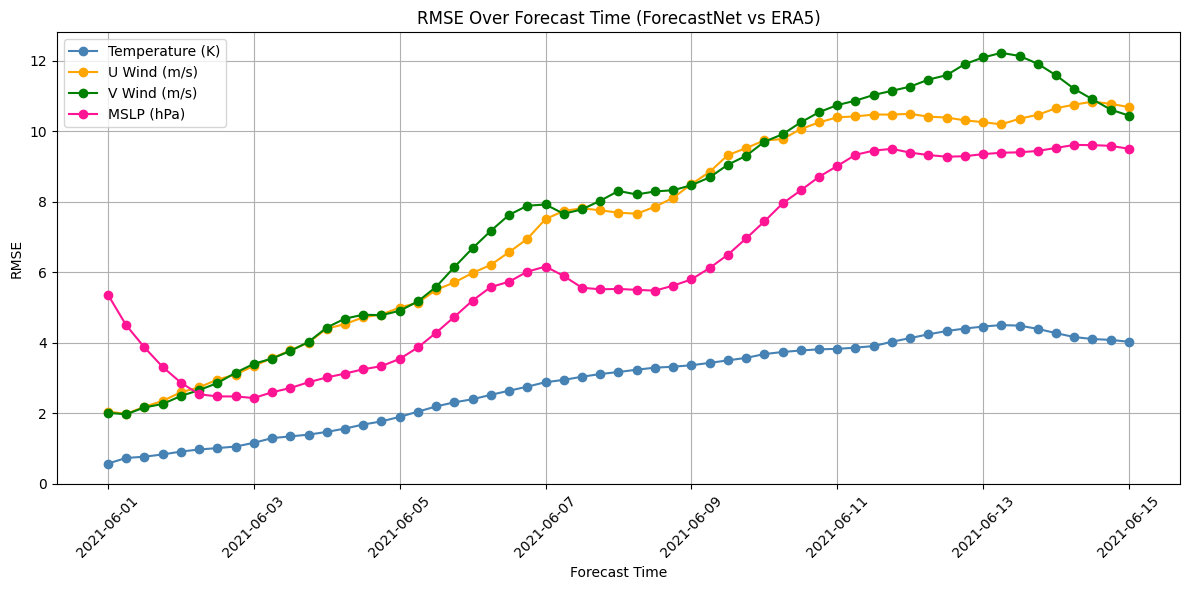

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each variable once
colors = {
    "Temperature (K)": "steelblue",
    "U Wind (m/s)": "orange",
    "V Wind (m/s)": "green",
    "MSLP (hPa)": "deeppink"  # Set custom color for MSLP
}

for var, rmse in rmse_results.items():
    plt.plot(ds_fc.time, rmse, label=var, marker='o', color=colors.get(var, None))

plt.title("RMSE Over Forecast Time (ForecastNet vs ERA5)")
plt.xlabel("Forecast Time")
plt.ylabel("RMSE")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot each variable once
colors = {
    "Temperature (K)": "steelblue",
    "U Wind (m/s)": "orange",
    "V Wind (m/s)": "green",
    "MSLP (hPa)": "deeppink"  # Set custom color for MSLP
}

for var, rmse in rmse_results.items():
    plt.plot(ds_fc.time, rmse, label=var, marker='o', color=colors.get(var, None))

plt.title("RMSE Over Forecast Time (ForecastNet vs ERA5)")
plt.xlabel("Forecast Time")
plt.ylabel("RMSE")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
